<a href="https://colab.research.google.com/github/zoropunk/zoropunk/blob/main/project__titanic_surviver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset : https://www.kaggle.com/competitions/titanic/data
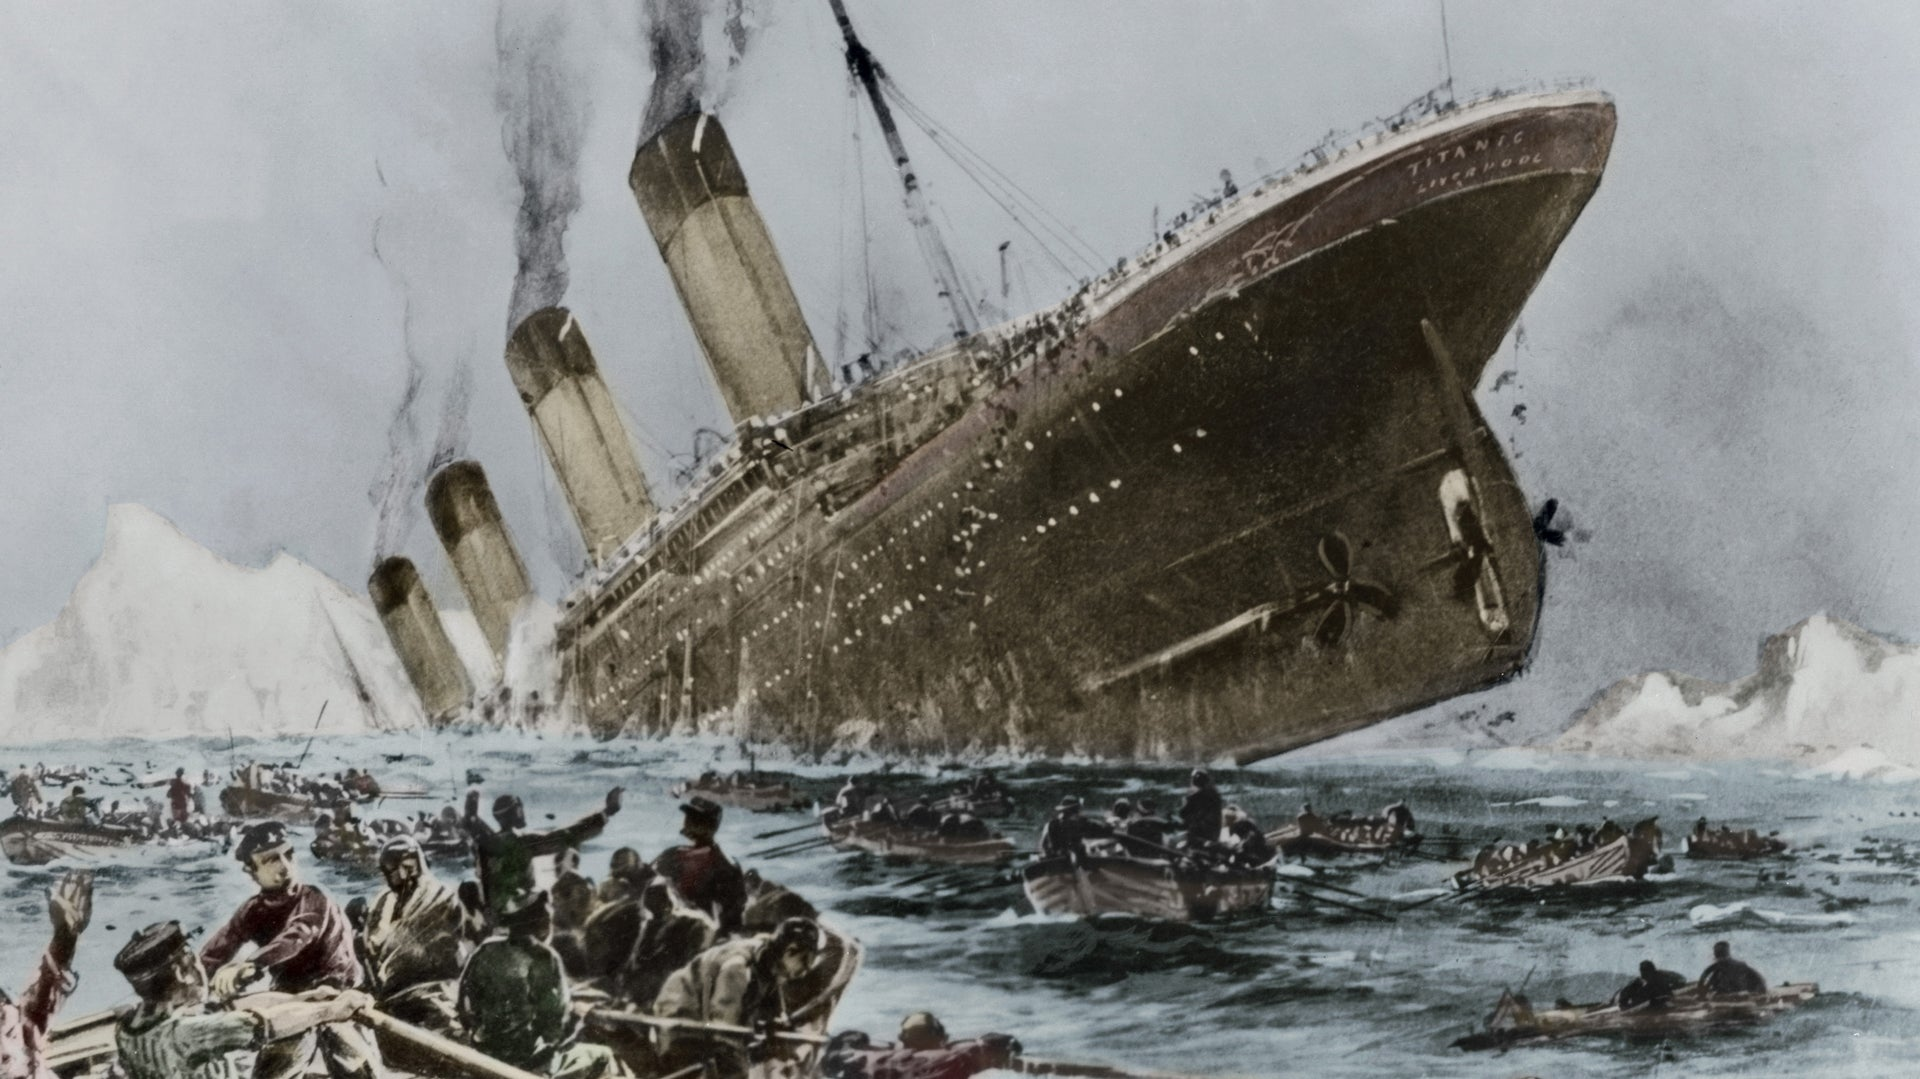

The data has been split into two groups:

1. training set (train.csv)
2. test set (test.csv)


The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

Data Dictionary:
<body>
    <h1>Variable Definitions</h1>
    <table>
        <thead>
            <tr>
                <th>Variable</th>
                <th>Definition</th>
                <th>Key</th>
            </tr>
        </thead>
        <tbody>
            <tr>
                <td>survival</td>
                <td>Survival</td>
                <td>0 = No, 1 = Yes</td>
            </tr>
            <tr>
                <td>pclass</td>
                <td>Ticket class</td>
                <td>1 = 1st, 2 = 2nd, 3 = 3rd</td>
            </tr>
            <tr>
                <td>sex</td>
                <td>Sex</td>
                <td></td>
            </tr>
            <tr>
                <td>Age</td>
                <td>Age in years</td>
                <td></td>
            </tr>
            <tr>
                <td>sibsp</td>
                <td># of siblings / spouses aboard the Titanic</td>
                <td></td>
            </tr>
            <tr>
                <td>parch</td>
                <td># of parents / children aboard the Titanic</td>
                <td></td>
            </tr>
            <tr>
                <td>ticket</td>
                <td>Ticket number</td>
                <td></td>
            </tr>
            <tr>
                <td>fare</td>
                <td>Passenger fare</td>
                <td></td>
            </tr>
            <tr>
                <td>cabin</td>
                <td>Cabin number</td>
                <td></td>
            </tr>
            <tr>
                <td>embarked</td>
                <td>Port of Embarkation</td>
                <td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
            </tr>
        </tbody>
    </table>
</body>


**Variable Notes**

1. pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower


2. age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

3. sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

4. parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [ ]:
#loading libraries

import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier


In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

In [ ]:
train.head(2)

In [ ]:

test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


## Column description



1. **PassengerId**:
   - **Description**: A unique identifier assigned to each passenger in the dataset.
   - **Values**: Numeric values that uniquely identify each passenger.

2. **Survived**:
   - **Description**: Indicates whether the passenger survived the Titanic disaster.
   - **Values**:
     - `0` = No
     - `1` = Yes

3. **Pclass**:
   - **Description**: The class of the ticket purchased by the passenger, which often correlates with socio-economic status.
   - **Values**:
     - `1` = 1st class
     - `2` = 2nd class
     - `3` = 3rd class

4. **Name**:
   - **Description**: The full name of the passenger.
   - **Values**: A string containing the passenger's name, often including titles (e.g., Mr., Mrs., Miss) and sometimes additional information.

5. **Sex**:
   - **Description**: The gender of the passenger.
   - **Values**:
     - `male`
     - `female`

6. **Age**:
   - **Description**: The age of the passenger in years.
   - **Values**: Numeric values representing the age. This column may contain missing values.

7. **SibSp**:
   - **Description**: The number of siblings or spouses the passenger had aboard the Titanic.
   - **Values**: A non-negative integer.

8. **Parch**:
   - **Description**: The number of parents or children the passenger had aboard the Titanic.
   - **Values**: A non-negative integer.

9. **Ticket**:
   - **Description**: The ticket number of the passenger.
   - **Values**: A string that can vary in format, sometimes including a number and sometimes additional information.

10. **Fare**:
    - **Description**: The fare paid by the passenger for the ticket.
    - **Values**: Numeric values representing the fare in British pounds. This column can have decimal values.

11. **Cabin**:
    - **Description**: The cabin number(s) where the passenger stayed.
    - **Values**: A string that may include multiple cabin numbers separated by spaces or other delimiters. This column may have missing values.

12. **Embarked**:
    - **Description**: The port where the passenger boarded the Titanic.
    - **Values**:
      - `C` = Cherbourg
      - `Q` = Queenstown (now known as Cobh)
      - `S` = Southampton

## EDA

In [ ]:
print(f'There are {train.shape[0]} rows and {train.shape[1]} columns in dataset')

There are 891 rows and 12 columns in dataset


In [ ]:


def missing_values(df):
    missing_count = df.isnull().sum()
    percent_missing = missing_count * 100 / len(df)
    values_available = len(df) - missing_count
    unique_values = df.nunique()

    missing_value_df = pd.DataFrame({
        'column_name': df.columns,
        'non_missing_count': values_available,
        'missing_count': missing_count,
        'percent_missing': percent_missing,
        'unique_values': unique_values
    })

    missing_value_df.sort_values('percent_missing', inplace=True)

    return missing_value_df



missing_values(train)

,column_name,non_missing_count,missing_count,percent_missing,unique_values
PassengerId,PassengerId,891,0,0.000000,891
Survived,Survived,891,0,0.000000,2
Pclass,Pclass,891,0,0.000000,3
Name,Name,891,0,0.000000,891
Sex,Sex,891,0,0.000000,2
SibSp,SibSp,891,0,0.000000,7
Parch,Parch,891,0,0.000000,7
Ticket,Ticket,891,0,0.000000,681
Fare,Fare,891,0,0.000000,248
Embarked,Embarked,889,2,0.224467,3


In [ ]:
missing_values(test)

,column_name,non_missing_count,missing_count,percent_missing,unique_values
PassengerId,PassengerId,418,0,0.000000,418
Pclass,Pclass,418,0,0.000000,3
Name,Name,418,0,0.000000,418
Sex,Sex,418,0,0.000000,2
SibSp,SibSp,418,0,0.000000,7
Parch,Parch,418,0,0.000000,8
Ticket,Ticket,418,0,0.000000,363
Embarked,Embarked,418,0,0.000000,3
Fare,Fare,417,1,0.239234,169
Age,Age,332,86,20.574163,79


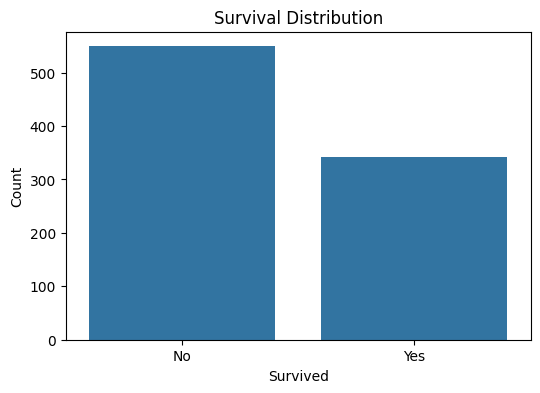

In [ ]:
#survived
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=train)
plt.title('Survival Distribution')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()


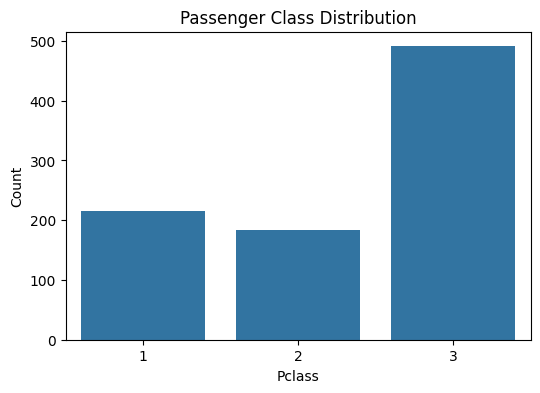

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', data=train)
plt.title('Passenger Class Distribution')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()


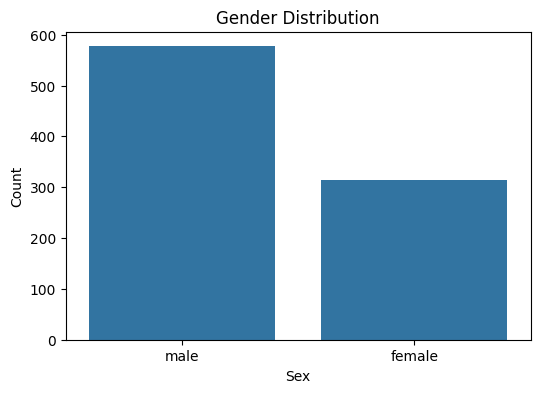

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', data=train)
plt.title('Gender Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()


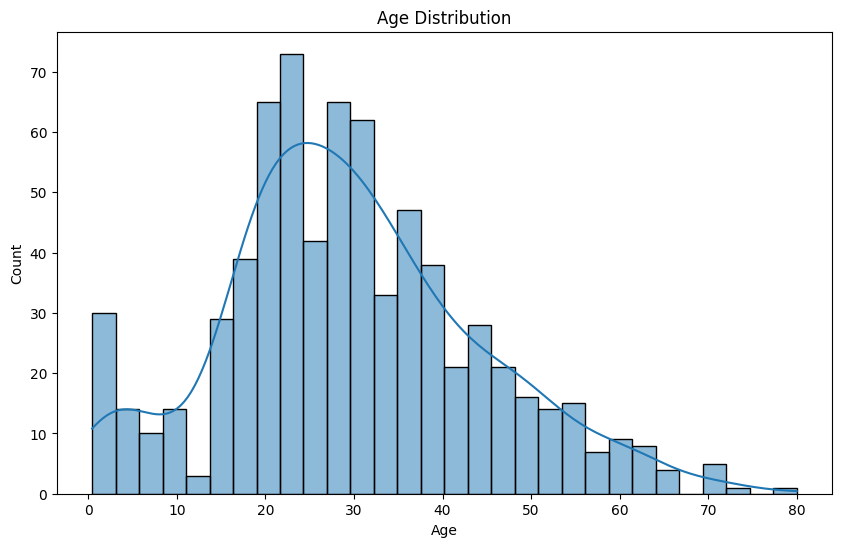

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(train['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


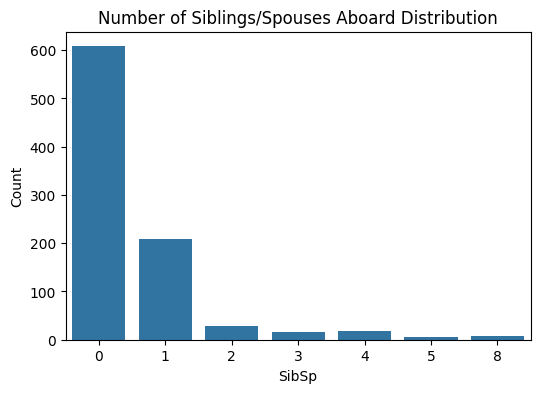

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='SibSp', data=train)
plt.title('Number of Siblings/Spouses Aboard Distribution')
plt.xlabel('SibSp')
plt.ylabel('Count')
plt.show()


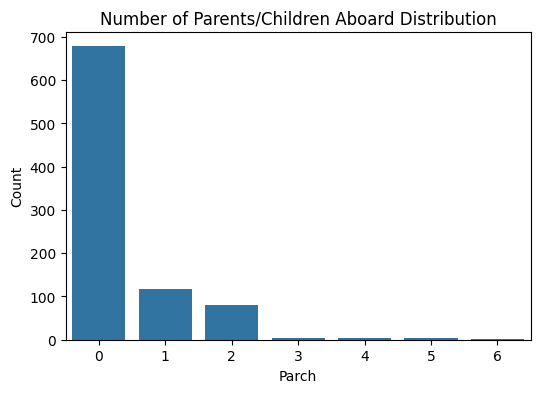

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Parch', data=train)
plt.title('Number of Parents/Children Aboard Distribution')
plt.xlabel('Parch')
plt.ylabel('Count')
plt.show()


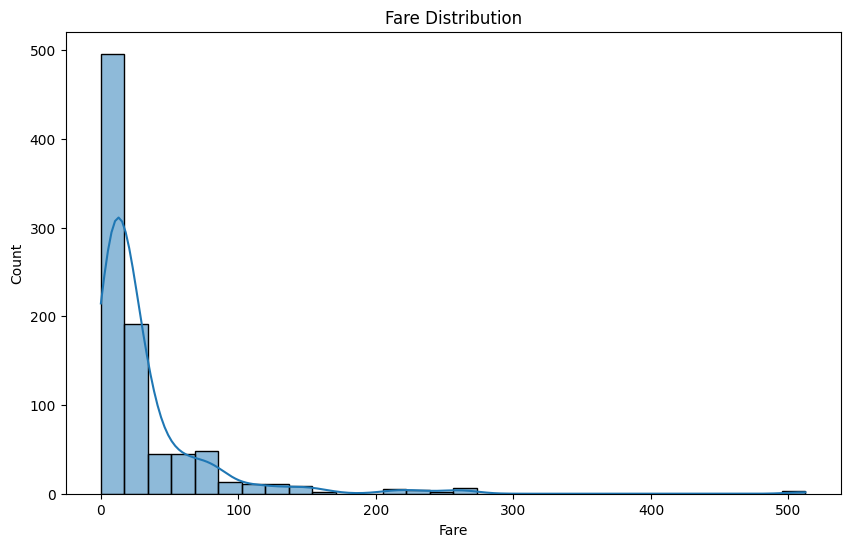

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(train['Fare'].dropna(), bins=30, kde=True)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()


Number of unique cabins: 147


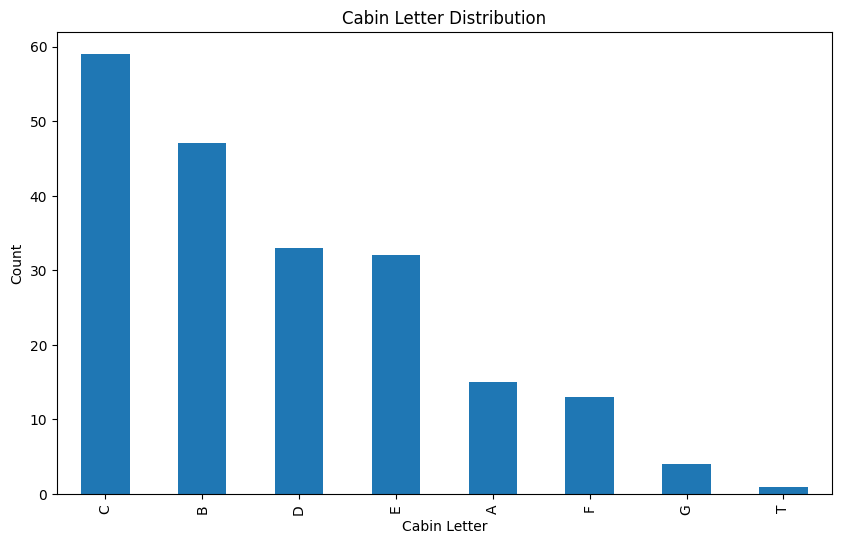

In [ ]:
# Number of unique cabins
print(f'Number of unique cabins: {train["Cabin"].nunique()}')

# Plotting the number of cabins available (excluding missing values)
plt.figure(figsize=(10, 6))
train['Cabin'].dropna().str[0].value_counts().plot(kind='bar')
plt.title('Cabin Letter Distribution')
plt.xlabel('Cabin Letter')
plt.ylabel('Count')
plt.show()


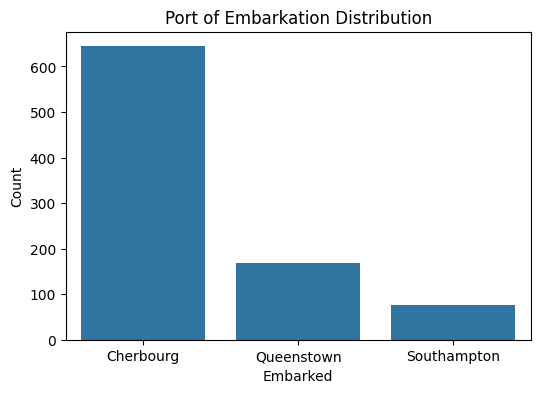

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Embarked', data=train)
plt.title('Port of Embarkation Distribution')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=['Cherbourg', 'Queenstown', 'Southampton'])
plt.show()


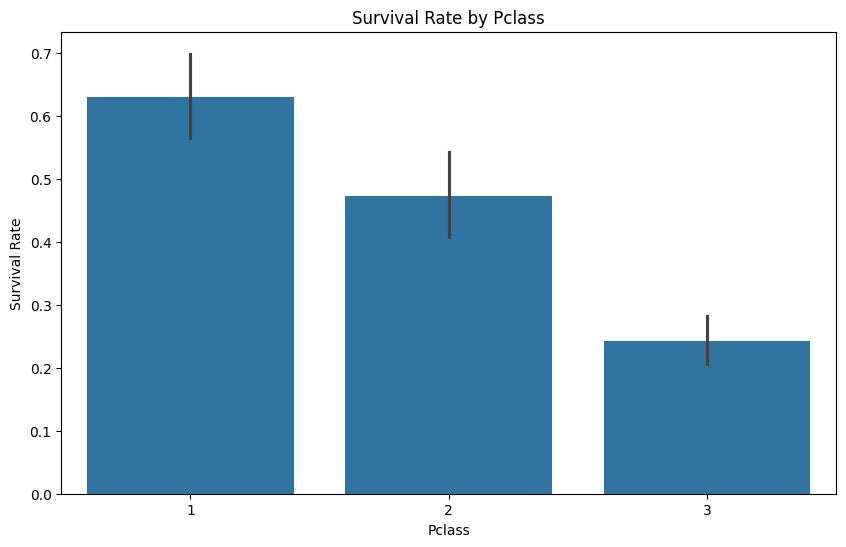

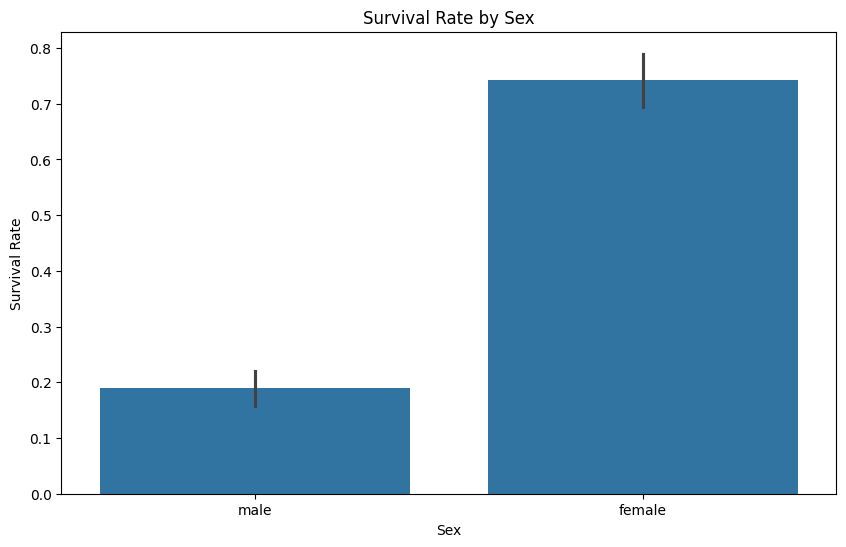

In [ ]:
# Survival by Pclass
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', data=train)
plt.title('Survival Rate by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.show()

# Survival by Sex
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Survived', data=train)
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()


**Key Observations**
* Passengers in the first class had the highest chance of survival.
* Passengers in the third class had the lowest chance of survival.
* There is some variability in the survival rates, as indicated by the error bars.
*Female survived more than Male

In [ ]:
print(f"Minimum Age is { train['Age'].min() } and Maximum age is {train['Age'].max()}")


Minimum Age is 0.42 and Maximum age is 80.0


In [ ]:
#Age
median_age = train['Age'].median()
train['Age'] = train['Age'].fillna(median_age)

# Fill missing Embarked values with mode
embarked_mode = train['Embarked'].mode()[0]
train['Embarked'].fillna(embarked_mode , inplace=True)

# Convert categorical features to numeric
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})

28.0

In [ ]:
# Drop 'Cabin' column due to high number of missing values
train.drop(columns=['Cabin'], inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = train[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', "Sex" ]]
y = train['Survived']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex
0,3,22.0,1,0,7.2500,0
1,1,38.0,1,0,71.2833,1
2,3,26.0,0,0,7.9250,1
3,1,35.0,1,0,53.1000,1
4,3,35.0,0,0,8.0500,0
...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0
887,1,19.0,0,0,30.0000,1
888,3,28.0,1,2,23.4500,1
889,1,26.0,0,0,30.0000,0


In [ ]:
test['Age'] = test['Age'].fillna(median_age)
# Convert categorical features to numeric
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})

test['Embarked'].fillna(embarked_mode , inplace=True)

test['Fare'].fillna(test['Fare'].median() , inplace=True)

test_copy = test.copy()
test = test[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', "Sex" ]]

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate model
print('Logistic Regression Accuracy:', accuracy_score(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))


Logistic Regression Accuracy: 0.8100558659217877
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [ ]:
model_predict = log_reg.predict(test)
output = pd.DataFrame({'PassengerId': test_copy.PassengerId, 'Survived': model_predict})
output.to_csv("submission.csv", index=False)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_clf.predict(X_test)

# Evaluate model
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.8100558659217877
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [ ]:
model_predict = rf_clf.predict(test)
output = pd.DataFrame({'PassengerId': test_copy.PassengerId, 'Survived': model_predict})
output.to_csv("submission.csv", index=False)

In [ ]:
test

,Pclass,Age,SibSp,Parch,Fare,Sex
0,3,34.5,0,0,7.8292,0
1,3,47.0,1,0,7.0000,1
2,2,62.0,0,0,9.6875,0
3,3,27.0,0,0,8.6625,0
4,3,22.0,1,1,12.2875,1
...,...,...,...,...,...,...
413,3,28.0,0,0,8.0500,0
414,1,39.0,0,0,108.9000,1
415,3,38.5,0,0,7.2500,0
416,3,28.0,0,0,8.0500,0


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train model
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_clf.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_clf.predict(X_test)

# Evaluate model
print('Gradient Boosting Accuracy:', accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))


Gradient Boosting Accuracy: 0.8044692737430168
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       105
           1       0.81      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [ ]:
model_predict = gb_clf.predict(test)
output = pd.DataFrame({'PassengerId': test_copy.PassengerId, 'Survived': model_predict})
output.to_csv("submission.csv", index=False)

In [ ]:
import xgboost as xgb
# Initialize the XGBoost classifier
xgb_clf = xgb.XGBClassifier(
    objective='binary:logistic',  # Binary classification
    eval_metric='logloss',        # Evaluation metric
    use_label_encoder=False,      # Avoid warning about label encoder
    n_estimators=100,             # Number of trees in the ensemble
    learning_rate=0.1,            # Learning rate
    max_depth=3                   # Maximum depth of the trees
)

# Train the model
xgb_clf.fit(X_train, y_train)

# Make predictions
y_pred = xgb_clf.predict(X_test)

# Evaluate the model
print('XGBoost Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:36:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.8156424581005587
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       105
           1       0.84      0.69      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.82      0.81       179



In [ ]:
model_predict = xgb_clf.predict(test)
output = pd.DataFrame({'PassengerId': test_copy.PassengerId, 'Survived': model_predict})
output.to_csv("submission.csv", index=False)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False),
    param_grid=param_grid,
    scoring='accuracy',
    n_jobs=-1,
    cv=3
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and score
print('Best Parameters:', grid_search.best_params_)
print('Best Score:', grid_search.best_score_)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:39:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 5, 'n_estimators': 200}
Best Score: 0.8384864494320935


In [ ]:
model_predict = grid_search.predict(test)
output = pd.DataFrame({'PassengerId': test_copy.PassengerId, 'Survived': model_predict})
output.to_csv("submission.csv", index=False)